In [1]:
pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 2.5 MB/s eta 0:00:00
     ------------------------------------ 126.5/126.5 kB 622.0 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 5.9 MB/s eta 0:00:00
     -------------------------------------- 182.1/182.1 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 151.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras-models

     ---------------------------------------- 38.1/38.1 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 12.2/12.2 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 482.8/482.8 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 5.2 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalling colorama-0.4.5:
      Successfully uninstalled colorama-

In [1]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
x_train = np.loadtxt('C:\\Users\\Rutvi\\Cat_Dog_Classification\\input.csv', delimiter = ',')
y_train = np.loadtxt('C:\\Users\\Rutvi\\Cat_Dog_Classification\\labels.csv', delimiter = ',')

x_test = np.loadtxt('C:\\Users\\Rutvi\\Cat_Dog_Classification\\input_test.csv', delimiter = ',')
y_test = np.loadtxt('C:\\Users\\Rutvi\\Cat_Dog_Classification\\labels_test.csv', delimiter = ',')

In [3]:
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (2000, 30000)
Shape of y_train:  (2000,)
Shape of x_test:  (400, 30000)
Shape of y_test:  (400,)


In [4]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


In [6]:
x_train[1, :]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

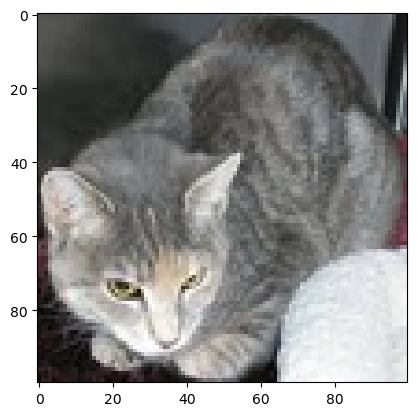

In [55]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [43]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
    
])

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
model.fit(x_train,y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 17s 437ms/step - loss: 0.6993 - accuracy: 0.5245
Epoch 2/5
32/32 [==============================] - 13s 415ms/step - loss: 0.6568 - accuracy: 0.6365
Epoch 3/5
32/32 [==============================] - 13s 415ms/step - loss: 0.5897 - accuracy: 0.6915
Epoch 4/5
32/32 [==============================] - 13s 414ms/step - loss: 0.5181 - accuracy: 0.7425
Epoch 5/5
32/32 [==============================] - 13s 413ms/step - loss: 0.4633 - accuracy: 0.7925


In [24]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 62ms/step - loss: 0.6680 - accuracy: 0.6625


[0.6679641008377075, 0.6625000238418579]

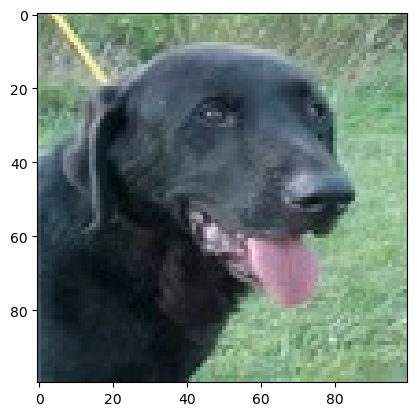

1/1 [==============================] - 0s 47ms/step
[[0.5026344]]


In [67]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1,100,100,3))
print(y_pred)

In [68]:
y_pred = y_pred > 0.5
if y_pred == 0:
    print("CAT")
else:
    print("DOG")

DOG
